In [12]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
%matplotlib inline

In [2]:
pd.options.display.width = 1200
pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100
pd.options.display.max_rows = 67

In [3]:
data = pd.read_csv("CW_ModelDevelopment.csv", index_col=[0,1])
data.head()

,,PP1,PP2,PP3,KF1,KF2,KF3,KF4,KF5,KF6,KF7,KF8,KF9,KF10,Z1,Z2,Z3,Z4,Z5,F1,F2,F3,F4,F5,F6,T1,T2,T3,T4,T5,VHSE1,VHSE2,VHSE3,VHSE4,VHSE5,VHSE6,VHSE7,VHSE8,ProtFP1,ProtFP2,ProtFP3,ProtFP4,ProtFP5,ProtFP6,ProtFP7,ProtFP8,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ST8,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,BLOSUM10,MSWHIM1,MSWHIM2,MSWHIM3,Class
ID,Epitope,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LDRLFNKKKELGQDK,E-10004,0.220667,-0.172667,0.055333,-0.175333,0.232667,-0.378667,0.565333,0.084000,-0.762000,0.542667,0.154000,0.130000,0.224000,0.902667,0.285333,-0.877333,-0.329333,0.407333,NaN,0.271067,0.096267,0.462000,-0.059733,0.049667,-3.556000,1.176000,-0.360667,0.206000,0.384000,-0.412000,0.360000,0.169333,0.358667,0.034000,0.190667,0.682667,-0.141333,-2.104000,1.502667,-0.427333,0.163333,-0.546667,0.634667,0.050000,0.165333,-0.693933,0.016867,-0.040067,-0.090733,-0.075400,0.401733,0.146333,0.395867,0.516667,-0.040000,-0.415333,-0.193333,0.127333,0.252667,-0.113333,0.211333,-0.048667,-0.317333,-0.208667,0.142000,-0.072667,Negative
LKLDRLFNKKKELGQ,E-10004,0.094000,-0.111333,0.106000,-0.283333,0.247333,-0.289333,0.438000,0.108667,NaN,0.708000,0.072000,NaN,NaN,0.352000,0.136667,-1.105333,-0.213333,0.413333,NaN,0.375867,0.182067,0.600600,-0.006733,0.157733,-3.538000,1.144667,-0.486000,0.329333,0.315333,-0.244667,0.320000,0.220667,0.306000,0.227333,0.012000,0.686000,-0.220000,-1.279333,1.351333,-0.338667,0.510667,-0.692000,0.769333,0.040000,0.068667,-0.688533,-0.004800,0.014533,-0.078133,-0.191733,0.463333,0.147400,0.392267,0.319333,-0.098000,-0.495333,-0.237333,0.195333,0.274667,0.002000,0.186000,-0.068000,-0.300000,-0.265333,0.256667,-0.019333,Negative
NKYKLKLDRLFNKKK,E-10004,0.253333,0.012667,0.302000,-0.060667,0.552667,-0.140667,0.614000,0.370000,-1.067333,0.624000,0.127333,0.221333,0.310000,0.516000,0.832667,-1.160667,0.306000,0.406000,NaN,0.287133,0.398933,0.393867,-0.107867,0.436600,-2.651333,1.295333,-0.641333,0.176000,0.057333,-0.360667,0.582667,0.500000,0.374000,0.603333,0.328000,0.701333,-0.134000,-1.461333,2.642667,0.057333,0.980667,-0.561333,0.526667,0.283333,0.161333,-0.530333,0.099267,0.132000,-0.134867,-0.171800,0.672400,0.115867,0.254533,0.362000,0.038000,-0.598000,-0.156000,0.324667,0.220000,0.052667,0.043333,-0.124667,-0.518667,-0.225333,0.254667,0.089333,Negative
RLFNKKKELGQDKMQ,E-10004,0.211333,-0.133333,0.107333,-0.269333,0.275333,-0.280667,0.609333,0.388667,NaN,0.653333,0.133333,NaN,NaN,0.849333,0.328667,-0.971333,-0.077333,0.280000,NaN,0.340600,0.103867,0.255533,-0.080400,0.185867,-3.426000,1.287333,-0.558000,0.219333,0.282000,-0.422667,0.283333,0.213333,0.423333,0.219333,0.229333,0.604667,-0.210000,-1.970000,1.733333,-0.234000,0.471333,-0.396667,0.691333,-0.155333,0.212667,-0.668733,0.094133,0.040467,-0.046800,-0.095933,0.429200,0.205933,0.384800,0.516000,-0.002667,-0.500667,-0.298000,0.240667,0.248667,-0.038000,0.193333,-0.021333,-0.228667,-0.193333,0.294000,-0.039333,Negative
YKLKLDRLFNKKKEL,E-10004,0.161333,0.010000,0.152000,-0.280000,0.515333,-0.240667,0.451333,0.131333,-1.094000,0.620000,0.025333,0.186667,0.439333,0.082000,0.596000,-1.170667,0.032667,0.317333,NaN,0.479333,0.431267,0.539267,0.003333,0.303533,-2.664667,1.235333,-0.604667,0.221333,0.039333,-0.204667,0.567333,0.508667,0.245333,0.401333,0.124000,0.610000,-0.129333,-0.759333,2.313333,-0.352000,0.681333,-0.817333,0.613333,0.169333,0.111333,-0.534533,0.035467,0.132800,-0.144600,-0.206467,0.696667,0.086600,0.244600,0.190000,-0.016000,-0.644667,-0.202000,0.245333,0.175333,-0.019333,0.106667,-0.034667,-0.434000,-0.234000,0.258000,0.080000,Negative


In [4]:
print("Shape:",data.shape)
print("Total Missing:")
for x, y in enumerate(data.isnull().any()):
    if y == True:
        name = data.columns[x]
        print("   "+name+":", data[name].isnull().sum())
print("Class variation:")        
print("   Positive:",len(data[data["Class"]=="Positive"]))
print("   Negative:",len(data[data["Class"]=="Negative"]))    

Shape: (15000, 67)
Total Missing:
   KF6: 7693
   KF9: 7693
   KF10: 7693
   F1: 13814
   T2: 496
   ST7: 81
Class variation:
   Positive: 1954
   Negative: 13046


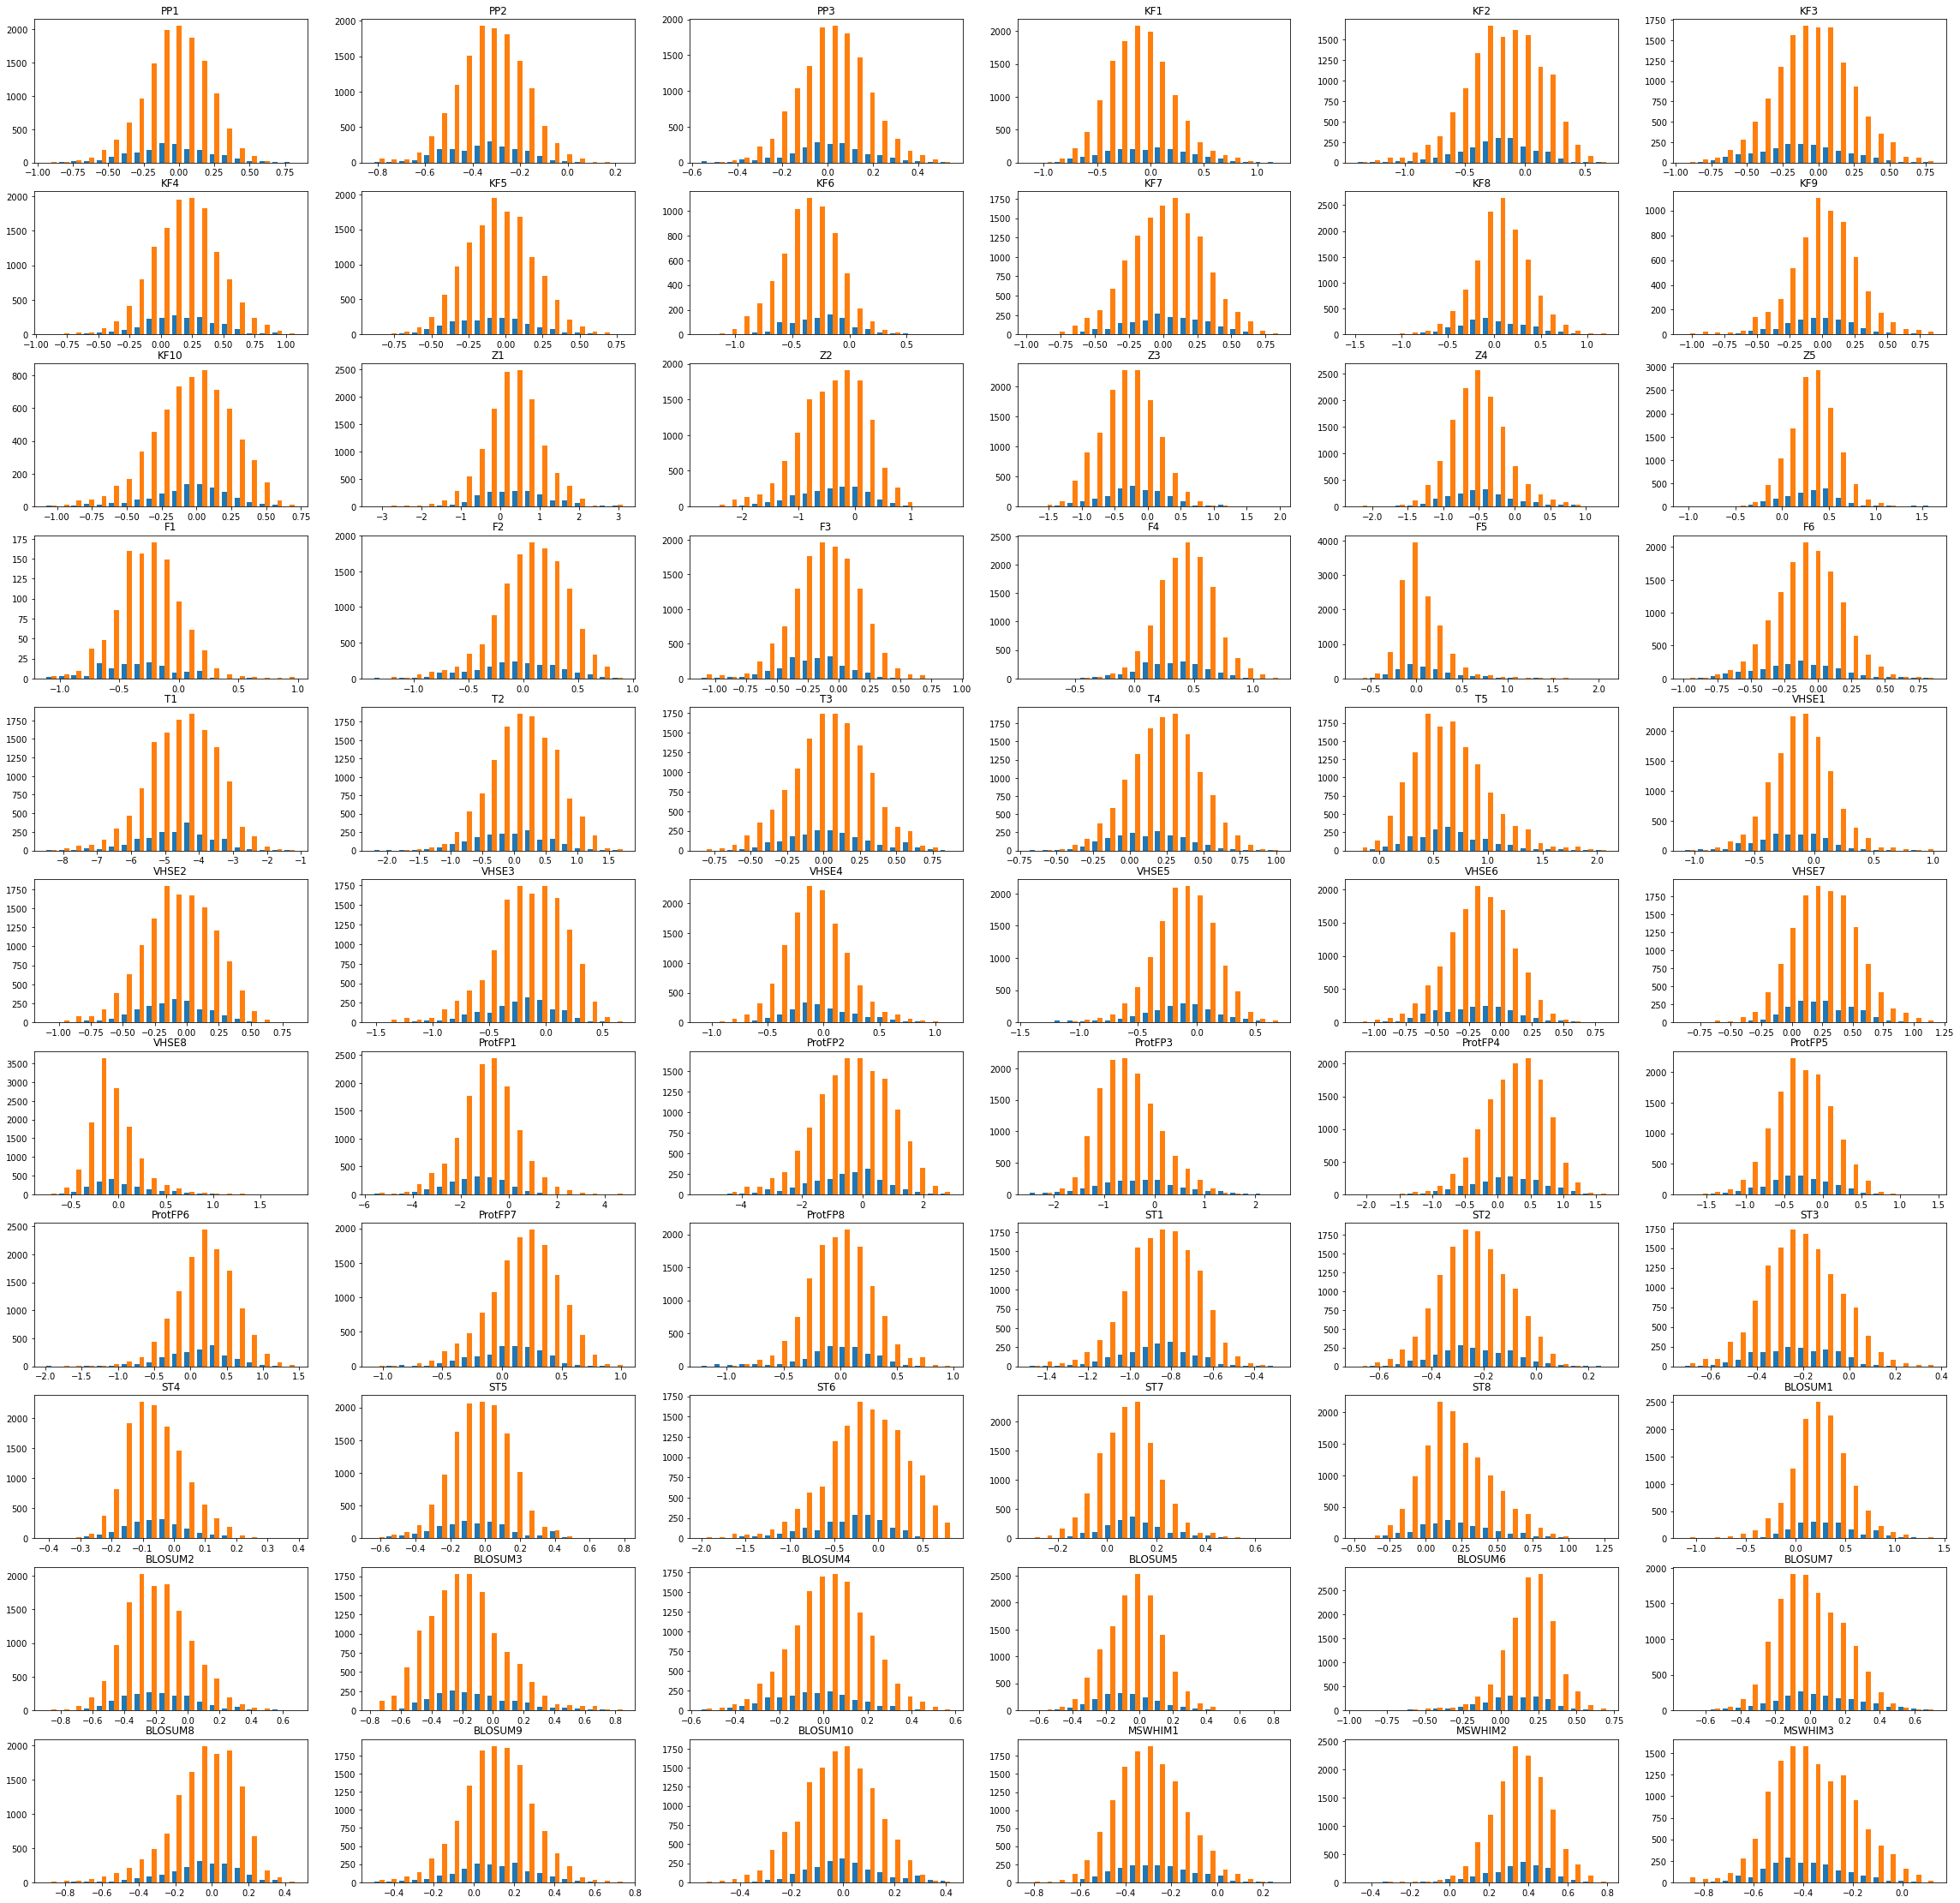

In [5]:
Positive = data[data["Class"]=="Positive"]
Negative = data[data["Class"]=="Negative"]
fig, ax = plt.subplots(nrows=11,ncols=6, figsize=(40,40))

row = 0
col = 0

for x,y in enumerate(data):
    loc =  ax[row][col]
    loc.hist([Positive[y],Negative[y]], bins=20);
    loc.set_title(y)
    col = col+1
    if(col==6):
        row= row+1
        col = 0
    if x == 65:
        break

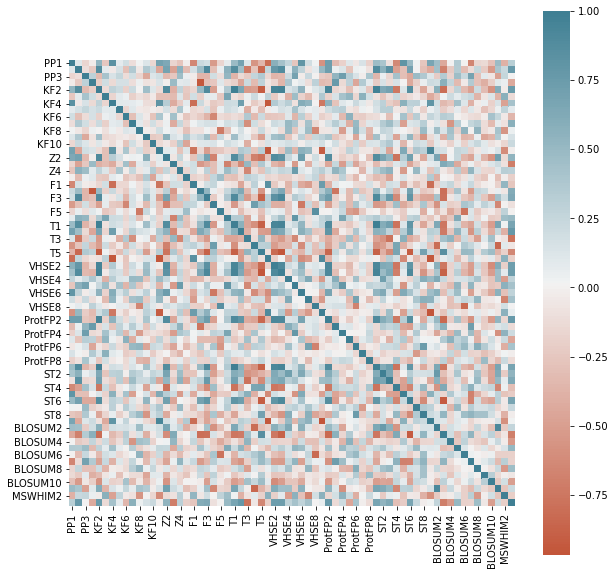

In [28]:
missing = ["KF6","KF9","KF10","F1","T2","ST7",]
corr = data.corr()

a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(
    corr,
    ax=ax,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [9]:
T2 = corr["T2"]
T2.sort()
#ProtFP2   0.805, MSWHIM3  0.778834, ST6 0.727538  BLOSUM3 -0.726562 PP1 0.701536       

BLOSUM3    -0.726562
Z3         -0.626447
BLOSUM7    -0.560690
VHSE1      -0.532371
T5         -0.509342
F1         -0.451013
KF1        -0.446383
ProtFP3    -0.444069
BLOSUM10   -0.409465
MSWHIM2    -0.394183
T3         -0.392156
ST4        -0.392149
F5         -0.305664
BLOSUM4    -0.260729
VHSE8      -0.249669
ProtFP1    -0.219172
F4         -0.169567
KF3        -0.167273
ProtFP8    -0.161502
KF6        -0.151645
PP3        -0.136163
ProtFP5    -0.135931
Z5         -0.131566
BLOSUM9    -0.125859
Z4         -0.111044
T4         -0.095053
ST8        -0.078335
ProtFP4    -0.017469
KF5         0.038679
KF10        0.039134
VHSE5       0.044263
ProtFP7     0.081798
ST7         0.109748
KF9         0.125274
KF8         0.165003
BLOSUM6     0.169824
VHSE4       0.255061
MSWHIM1     0.261621
ST3         0.277159
BLOSUM2     0.280428
KF7         0.312621
BLOSUM8     0.317054
BLOSUM1     0.319397
ST5         0.339636
F6          0.341751
Z1          0.361979
ProtFP6     0.389301
VHSE7       0